Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.
Epoch 1/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 226s 179ms/step - accuracy: 0.4486 - loss: 1.5804 - val_accuracy: 0.5625 - val_loss: 1.2492
Epoch 2/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 234s 186ms/step - accuracy: 0.5752 - loss: 1.2184 - val_accuracy: 0.5828 - val_loss: 1.1896
Epoch 3/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 229s 182ms/step - accuracy: 0.5963 - loss: 1.1429 - val_accuracy: 0.5872 - val_loss: 1.1872
Epoch 4/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 240s 191ms/step - accuracy: 0.6149 - loss: 1.1016 - val_accuracy: 0.5932 - val_loss: 1.1719
Epoch 5/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 232s 185ms/step - accuracy: 0.6245 - loss: 1.0651 - val_accuracy: 0.6030 - val_loss: 1.1480
311/311 ━━━━━━━━━━━━━━━━━━━━ 47s 152ms/step - accuracy: 0.6002 - loss: 1.1513
Test Loss: 1.148037314414978, Test Accuracy: 0.602963387966156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
Predicted class for the image: bird


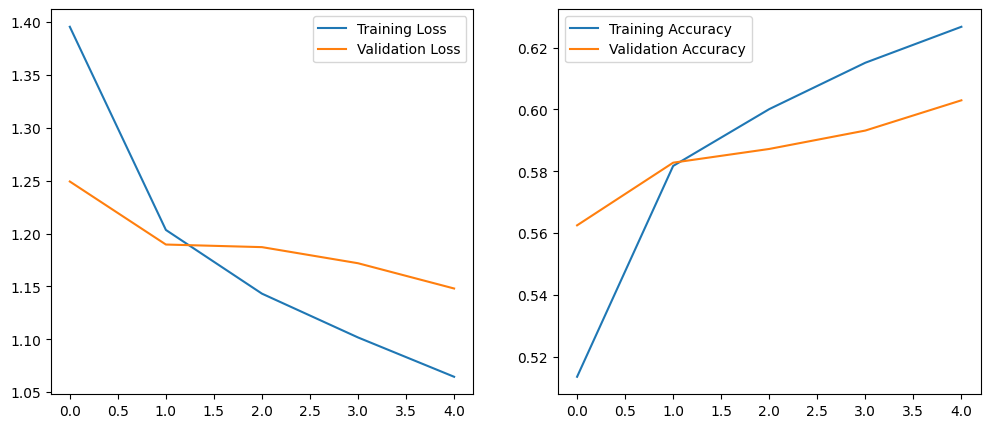

In [3]:
# a. Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# b. Load CIFAR-10 dataset and preprocess images
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    'cifar-10-img/train', target_size=(32, 32), batch_size=32, class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    'cifar-10-img/test', target_size=(32, 32), batch_size=32, class_mode='categorical'
)

# c. Load pre-trained VGG16 model with local weights file and add custom layers
base_model = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))
base_model.load_weights(r"vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
base_model.trainable = False  # Freeze base model layers

# Custom classifier on top
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# d. Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=test_generator, epochs=5)

# e. Evaluate model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# f. Predict class for a new image
new_img_path = 'cifar-10-img/test/bird/7.png'
img = tf.keras.preprocessing.image.load_img(new_img_path, target_size=(32, 32))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
class_labels = {v: k for k, v in train_generator.class_indices.items()}
print(f"Predicted class for the image: {class_labels[predicted_class]}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()